# Comparando as codificações por meio de testes

In [1]:
import import_ipynb
from t1_encoding import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch

def bitrate(Rs: float, M: int):
    return Rs * np.math.log2(M)

def test(encoding_function, frame_size, M, baudrate=1000) -> dict:
    array_size = frame_size // 8
    data = np.random.randint((2**8) - 1, size=array_size, dtype=np.uint8)

    Rb = bitrate(baudrate, M)

    bit_period = 1 / Rb
    sampling_period = bit_period / 10

    encoded_data = encoding_function(data, bit_period, sampling_period)
    encoded_data = np.array(encoded_data, dtype=np.int8)
    
    std = np.std(encoded_data)
    var = np.var(encoded_data)
    s2 = np.var(encoded_data, ddof=1)

    return {'Rb': Rb,
            'Rs': baudrate,
            'Encoding': str(encoding_function.__name__),
            'M': M,
            'Frame Size': frame_size,
            'std': std,
            'var': var,
            's2': s2,
            'output': encoded_data}

def report_test_result(test_result: dict):
    print('------------------------------------')
    print('Encoding =', test_result['encoding'])
    print('\tRb =', test_result['Rb'])
    print('\tRs =', test_result['Rs'])
    print('\tFrame Size =', test_result['Frame Size'])
    print('\tstd =', test_result['std'])
    print('\tvar =', test_result['var'])


importing Jupyter notebook from t1_encoding.ipynb


## Configura e executa  os testes

In [2]:
if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    frame_sizes = range(32, 16384, 512)
    encoding_functions = [
        (encode_unipolar_rz, 2),
        (encode_unipolar_nrz, 2),
        (encode_bipolar_rz, 2),
        (encode_bipolar_nrz, 2),
        (encode_polar4_nrz, 4),
        (encode_nrzm, 2),
        (encode_nrzs, 2),
        (encode_manchester, 2),
    ]
    test_results = []

    for frame_size in frame_sizes:
        for (encoding_function, M) in encoding_functions:
            test_results += [test(encoding_function, frame_size, M)]

## Plota resultados

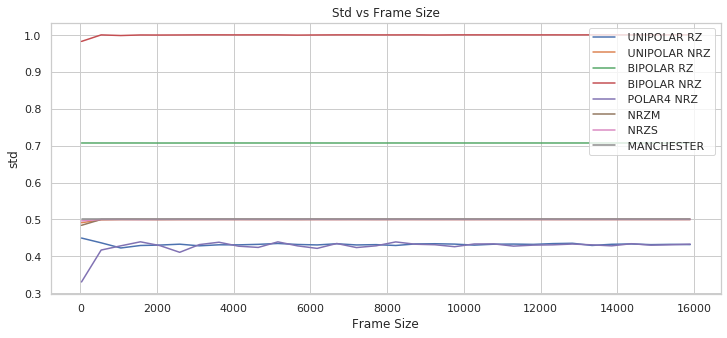

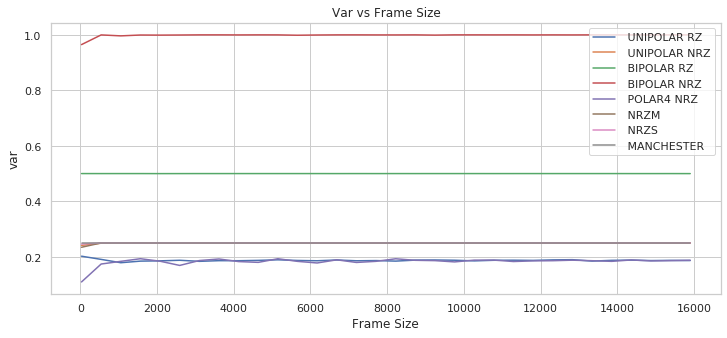

In [3]:
if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    import seaborn as sns
    sns.set()
    sns.set_style("whitegrid")

    df = pd.DataFrame(test_results)

    plt.figure(figsize=(12, 5))
    plt.title('Std vs Frame Size')
    ax = plt.gca()
    for (encoding, _) in encoding_functions:
        encoding = str(encoding.__name__)
        label = encoding.replace('encode', '').replace('_', ' ').upper()
        ax = sns.lineplot(data=df[df['Encoding'] == encoding],
                          y='std',
                          x='Frame Size',
                          label=label,
                          ax=ax)

    plt.figure(figsize=(12, 5))
    plt.title('Var vs Frame Size')
    ax = plt.gca()
    for (encoding, _) in encoding_functions:
        encoding = str(encoding.__name__)
        label = encoding.replace('encode', '').replace('_', ' ').upper()
        ax = sns.lineplot(data=df[df['Encoding'] == encoding],
                          y='var',
                          x='Frame Size',
                          label=label,
                          ax=ax)
        
